# CSE 5520 Homework 3

| | |
|-|-|
| **Student** | Lynn Pepin ('Tristan Pepin')
|              | tmp13009 / 2079724
| **Due date** | 2021 / Sept / 23 (Thur), 11:59PM


This is Lynn Pepin's report for CSE 5520 homework 3.

# Part 1: Linear Regression.

Consider a simple set of data points $\{\langle2,2\rangle, \langle3,3\rangle, \langle4,5\rangle, \langle6,4\rangle\}$.


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

points = np.array([(2,2), (3,3), (4,5), (6,4)])
# points[:,0] represent x
# points[:,1] represent y

EPS = 0.0000001

def almost_equal(a,b,eps=EPS):
    return abs(a-b) <= eps


## Step 1:

Show the given $<x, y>$ data points in a 2D plot

## Step 2:

Draw the regression line over the plot shown in Step 1. Steps 1 and 2 should be done in one cell of Jupyter Notebook.

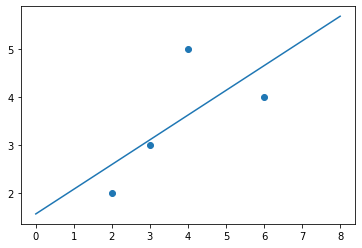

In [42]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])

# 1. Get the linear regression coefficients (i.e. slope and y-intercept) using np.polyfit with degree 1
# (note: i'd usually refer to these as c_0, c_1, ...)
mm, bb = np.polyfit(x=points[:,0], y=points[:,1], deg=1)

# 2. reg_fit is a simple slope (y=mx+b); reg_Xs and reg_Ys are the X/Y values
reg_fit = lambda xx: mm*xx + bb
reg_Xs = np.linspace(0,8,81)
reg_Ys = [reg_fit(xx) for xx in reg_Xs]

# Plot our line and our points
plt.scatter(points[:,0], points[:,1])
plt.plot(reg_Xs, reg_Ys)

## Step 3:

Create a separate markdown cell and include your manual calculation of the components of the equation designed to produce the linear regression line. 

Hint: You can do calculation using MS Excel and import the snipped image in the markdown cell. There are other ways also. This hand calculation should show how intercept and slope are calculated. 

In [57]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])
Xs = points[:,0]
Ys = points[:,1]
c_1_true, c_0_true = np.polyfit(x=Xs, y=Ys, deg=1)

# y intercept
denom = len(Xs)*(Xs@Xs) - sum(Xs)**2
c_0 = (sum(Ys)*(Xs@Xs) - sum(Xs)*(Xs@Ys)) / denom

# slope
c_1 = (len(Xs)*(Xs@Ys) - sum(Xs)*sum(Ys)) / denom

# check my work
assert almost_equal(c_0, c_0_true), "Mistake calculating intercept"
assert almost_equal(c_1, c_1_true), "Mistake calculating slope"

## Step 4:

Show how covariance matrix is calculated using python. Print the value.

In [63]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])
Xs = points[:,0]
Ys = points[:,1]
NN = len(Xs)

# One way to calculate covariance
cov_matrix = np.cov([Xs, Ys])

assert cov_xy_true == cov_yx_true, "What? How can these be different?"

print("Covariance matrix:")
print(np.round(cov_matrix, 5))

Covariance matrix:
[[2.91667 1.5    ]
 [1.5     1.66667]]


## Step 5:

Create a separate markdown cell and include your manual calculation of the components of the equation designed to produce covariance matrix. 

In [67]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])
Xs = points[:,0]
Ys = points[:,1]
NN = len(Xs)

# One way to calculate covariance
cov_matrix = np.cov([Xs, Ys])

# Another way to calculate covariance
cov_xx = sum([(xi - Xs.mean())**2 for xi in Xs])/(NN-1)
cov_yy = sum([(yi - Ys.mean())**2 for yi in Ys])/(NN-1)
cov_xy = (Xs - Xs.mean())@(Ys - Ys.mean()) / (NN-1)

# Confirm our work
cov_xx_true = cov_matrix[0,0]
cov_yy_true = cov_matrix[1,1]
cov_xy_true = cov_matrix[0,1]
cov_yx_true = cov_matrix[1,0]

assert cov_xy_true == cov_yx_true, "What? How can these be different?"
assert almost_equal(cov_xx, cov_xx_true), "Mistake calculating cov_xx"
assert almost_equal(cov_xy, cov_xy_true), "Mistake calculating cov_xy"
assert almost_equal(cov_yy, cov_yy_true), "Mistake calculating cov_xy"

print("Covariance matrix:")
cov_matrix = np.array([[cov_xx, cov_xy], [cov_xy, cov_yy]])
print(np.round(cov_matrix, 5))

Covariance matrix:
[[2.91667 1.5    ]
 [1.5     1.66667]]


## Step 6:

Show how Pearson’s correlation coefficient is computed using python. Print the value.



In [87]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])
Xs = points[:,0]
Ys = points[:,1]
NN = len(Xs)

# One way to calculate Pearson's Correlation Coefficient
pcc = np.corrcoef(Xs, Ys)
pcc_xy = pcc[0,1]

# Fix this, since the calculations in the slides use N-1
# rather than the more-common denominator of simply N
pcc_xy_fixed = pcc_xy * NN / (NN-1)

print(round(pcc_xy_fixed,6))

0.907115


## Step 7:

Create a separate markdown cell and include your manual calculation of the components of the equation designed to produce Pearson’s correlation coefficient. 

> **Lynn's notes:** Strangely, the slides  definition uses a term $(n-1)$ in the denominator, rather than the more common $n$. This is accounted for in my work


In [88]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])
Xs = points[:,0]
Ys = points[:,1]
NN = len(Xs)

# One way to calculate Pearson's Correlation Coefficient
pcc = np.corrcoef(Xs, Ys)
pcc_xy = pcc[0,1]
pcc_xy_fixed = pcc_xy * NN / (NN-1)

# Calculate by hand; re-use what we got before
cov_m = np.cov([Xs, Ys])
cov_xx = cov_matrix[0,0]
cov_yy = cov_matrix[1,1]
cov_xy = cov_matrix[0,1]

sig_x = Xs.std()
sig_y = Ys.std()

#corr = cov_xy/((NN-1)*sig_x*sig_y)
corr = ((Xs@Ys)-NN*Xs.mean()*Ys.mean())/((NN-1)*sig_x*sig_y)

assert almost_equal(corr, pcc_xy_fixed), "Uh oh, mistake with calc"

print(round(corr, 6))

0.907115


## Step 8.

This time, you use the nba.csv from HuskyCT. Produce a regression line for this data set using weight as dependent variable and height as independent variable. The plot should include data points and the regression line. The intercept and slope values should be included in the title of the plot where should appear at the top (centered in bold) above the plot.


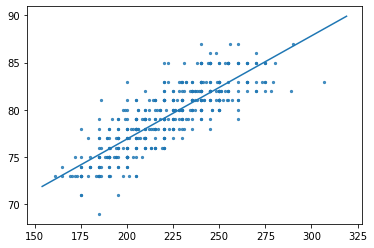

In [106]:
nbadf = pd.read_csv("nba.csv")
ww = nbadf['Weight']
hh = nbadf['Height']

c_1, c_0 = np.polyfit(x=ww, y=hh, deg=1)
Xs = list(range(154,320))
Ys = [c_1*xx + c_0 for xx in Xs]

plt.plot(Xs,Ys)
plt.scatter(ww,hh,s=5,alpha=.8)


## Step 9.

Using the regression line in Step 8, compute and print the “predicted” weight for a rookie player whose height is known 91.



---


# Part II: Scatter Plot with Pearson Correlation Coefficient

Consider the article “Integrated systems approach identifies genetic nodes and networks in lateonset Alzheimer's disease” Cell. 2013 Apr 25;153(3):707-20. PMID: 23622250; PMCID: PMC3677161, by Zhang et al.

The gene expression dataset published for this article GSE44768 is available at https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE44768. This dataset has been preprocessed and some portion is available in HuskyCT’s Data folder. The article “GSE44768_article” is also available in HW3 folder. 

Do Part II steps using only the data from the Dementia group (GSE44768_CR_alz_female_reduced.csv).


# Step 1.

Create and show two scatter plots, one comparing gene expression values between TYROBP and DOCK2 and the other comparing gene expression values between TYROBP and GSTA4.

Each plot should have the appropriate title including $r$ (Pearson correlation coefficient value).


## Step 2.

Create and show two scatter plots, one comparing gene expression values between TYROBP and FCER1G and the other comparing gene expression values between ACBD5 and LMAN1. This time, both plots should appear side by side. Each plot should have the appropriate title including r.